The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


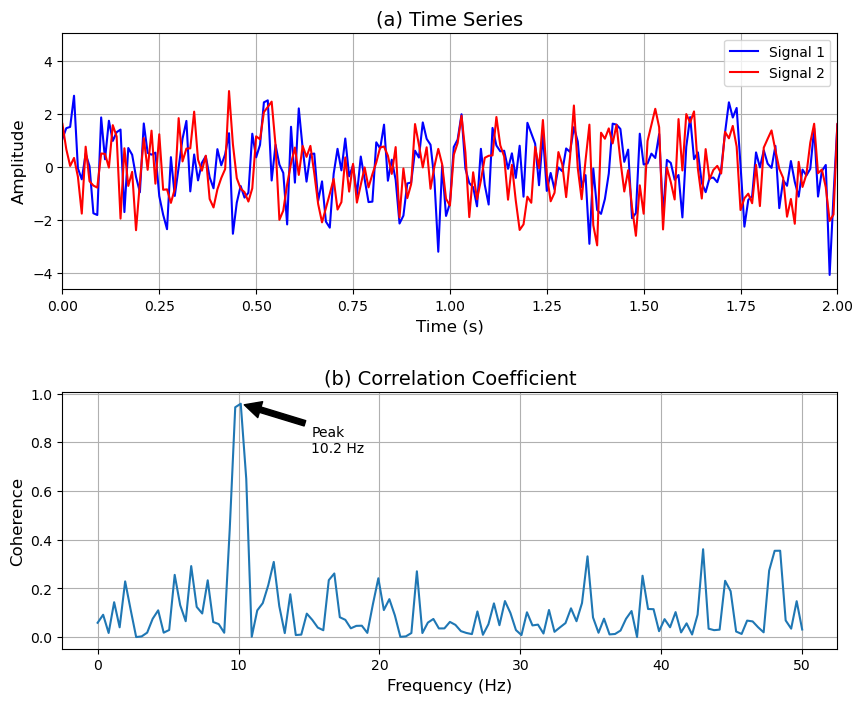

In [9]:
##Task 1##

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01 # time step
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))     # 白噪音
nse2 = np.random.randn(len(t))     # 白噪音

# Two signals with a coherent part at 10Hz and a random part
#  周期信号叠加白噪音；
#  可尝试删除白噪音，检测效果。
s1 = np.sin(2 * np.pi * 10 * t) + nse1 
s2 = np.sin(2 * np.pi * 10 * t) + nse2

# 绘制分图
fig, axs = plt.subplots(2, 1, figsize=(10, 8)) # 调整图像大小
fig.subplots_adjust(hspace=0.4)  # 调整子图间距

# 绘制时间序列图
axs[0].plot(t, s1, label='Signal 1', color='b') 
axs[0].plot(t, s2, label='Signal 2', color='r')
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('(a) Time Series')
axs[0].legend()  # 添加图例
axs[0].grid(True)

# 计算和绘制相干性
cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_title('(b) Correlation Coefficient')
axs[1].grid(True)

# 添加注释指出峰值位置
peak_index = np.argmax(cxy)
peak_frequency = f[peak_index]
peak_coherence = cxy[peak_index]
axs[1].annotate(f'Peak\n{peak_frequency:.1f} Hz',xy=(peak_frequency, peak_coherence), 
                xytext=(peak_frequency + 5, peak_coherence - 0.2),
                arrowprops=dict(facecolor='black', shrink=0.05),fontsize=10)

# 调整图表美学元素
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)
    ax.title.set_size(14)

# 保存图像为eps和jpeg格式
plt.savefig('task1_plot.eps', format='eps')
plt.savefig('task1_plot.jpeg', format='jpeg')

plt.show()

/var/folders/wc/_v36p0nn4vdc6f2lrzm5nhwm0000gn/T/ipykernel_45047/1876529358.py:86: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


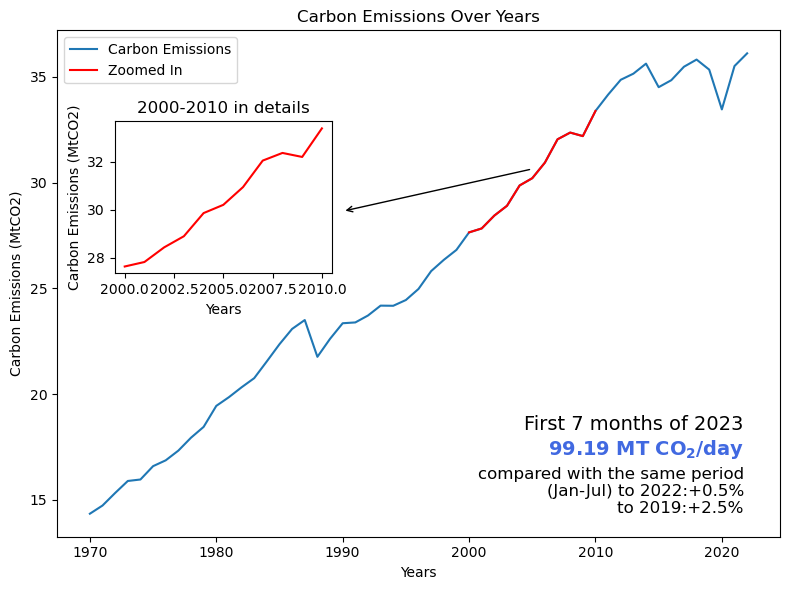

In [13]:
##Task 2##

import matplotlib.pyplot as plt
import numpy as np
import openpyxl as yxl

# Read the data from Excel
carbon = yxl.load_workbook("carbon.xlsx")
sheet = carbon['Sheet1']
data1 = []

# Extract data (assuming data is in the second column)
for row in sheet.iter_rows(min_row=2, values_only=True):  # Skip header if present
    data1.append(row[1])  # Adjust the index if your data is in a different column

# Convert data1 to a NumPy array for plotting
data1 = np.array(data1)

# Prepare data
years = np.arange(1970, 2024, 1)

# Define the time period for zooming
start_year = 2000
end_year = 2010

# Find the indices corresponding to the start and end years
start_index = np.where(years == start_year)[0][0]
end_index = np.where(years == end_year)[0][0]

# Plotting with constrained layout
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

# Plot the entire data
ax.plot(years, data1, label='Carbon Emissions')

# Add an inset plot in an empty space
ax_inset = ax.inset_axes([0.08, 0.52, 0.3, 0.3])  # [left, bottom, width, height] in fraction of the figure size
ax_inset.plot(years[start_index:end_index+1], data1[start_index:end_index+1], label='Zoomed In', color='red')
ax_inset.set_title('2000-2010 in details')
ax_inset.set_xlabel('Years')
ax_inset.set_ylabel('Carbon Emissions (MtCO2)')

# Plot the zoomed-in section
plt.plot(years[start_index:end_index+1], data1[start_index:end_index+1], label='Zoomed In', color='red')

# Customize the main plot
ax.set_xlabel('Years')
ax.set_ylabel('Carbon Emissions (MtCO2)')
ax.set_title('Carbon Emissions Over Years')
ax.legend()

# Add an arrow pointing from the main plot to the inset plot
ax.annotate('', xy=(1990, data1[start_index] +1), xytext=(2005, data1[start_index] +3),  # Adjust xytext coordinates as needed
            arrowprops=dict(facecolor='red', arrowstyle='->'))

# Add annotations in the bottom-right corner
annotation_text_1 = (
    "First 7 months of 2023\n"
)

annotation_text_2 = (
     r"$\bf{99.19\ MT\ CO_2/day}$"
)
annotation_text_3 = (
    "compared with the same period\n"
    "(Jan-Jul) to 2022:+0.5%\n"
    "to 2019:+2.5%"
)

# Add the first part of the annotation
ax.text(0.95, 0.16, annotation_text_1, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', horizontalalignment='right',
        color='black') # Black color for the default text

# Add the second part of the annotation
ax.text(0.95, 0.15, annotation_text_2, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', horizontalalignment='right',
        color='royalblue')

# Smaller font size for the last three lines
ax.text(0.95, 0.04, annotation_text_3, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right',
        color='black')

# Apply tight_layout and save the plot
plt.tight_layout()
plt.savefig('carbon emissions.png', dpi=300)

# Show the plot if needed
plt.show()


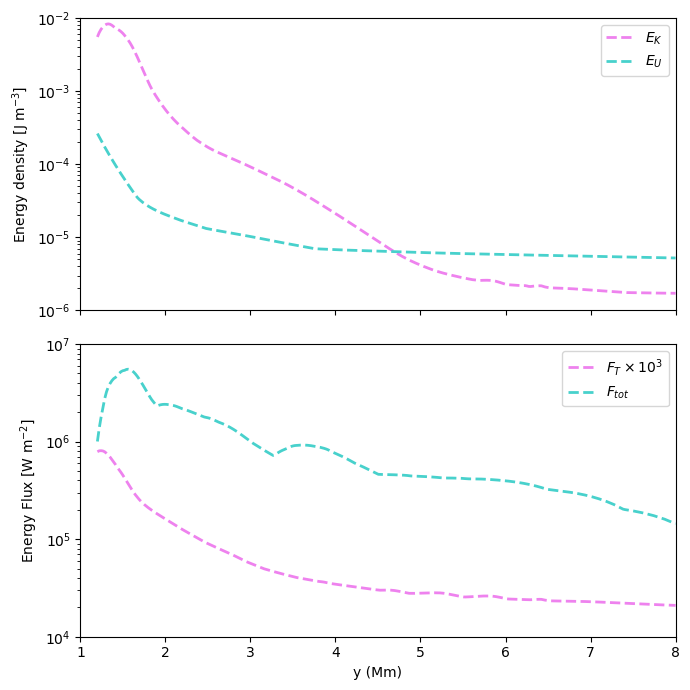

In [17]:
##Task 3##

import numpy as np
import matplotlib.pyplot as plt

# Assuming data is loaded correctly
data = np.genfromtxt("./data.dat")
height = data[:, 0]
Vx = data[:, 1]
Ke = data[:, 2]
IE = data[:, 3]
Tz = data[:, 4]
Fz = data[:, 5]

# colors
Violet = "#EE82EE"
MediumTurquoise = "#48D1CC"

fig, axs = plt.subplots(2, 1, figsize=(7, 7))

# Top plot (Energy density)
axs[0].plot(height, Ke, '--', color=Violet, linewidth=2, label='$E_K$')
axs[0].plot(height, IE, '--', color=MediumTurquoise, linewidth=2, label='$E_U$')
axs[0].set_yscale('log')
axs[0].set_ylabel('Energy density [J m$^{-3}$]')
axs[0].legend(loc='best')
axs[0].set_xlim([1, 8])
axs[0].set_ylim([1e-6, 1e-2])
axs[0].set_xticklabels([])

# Bottom plot (Energy Flux)
axs[1].plot(height, Tz * 1e3, '--', color=Violet, linewidth=2, label='$F_T \\times 10^3$')
axs[1].plot(height, Fz, '--', color=MediumTurquoise, linewidth=2, label='$F_{tot}$')
axs[1].set_yscale('log')
axs[1].set_xlabel('y (Mm)')
axs[1].set_ylabel('Energy Flux [W m$^{-2}$]')
axs[1].legend(loc='best')
axs[1].set_xlim([1, 8])
axs[1].set_ylim([1e4, 1e7])

plt.savefig('merge image.png', dpi=300)
plt.tight_layout()
plt.show()


二维随机数列的平均值为[-0.03911517 -0.02603845]
二维随机数列的标准差为[0.99465748 1.05332404]
二维随机数列的协方差矩阵为[[0.99033384 0.48986588]
 [0.48986588 1.11060214]]


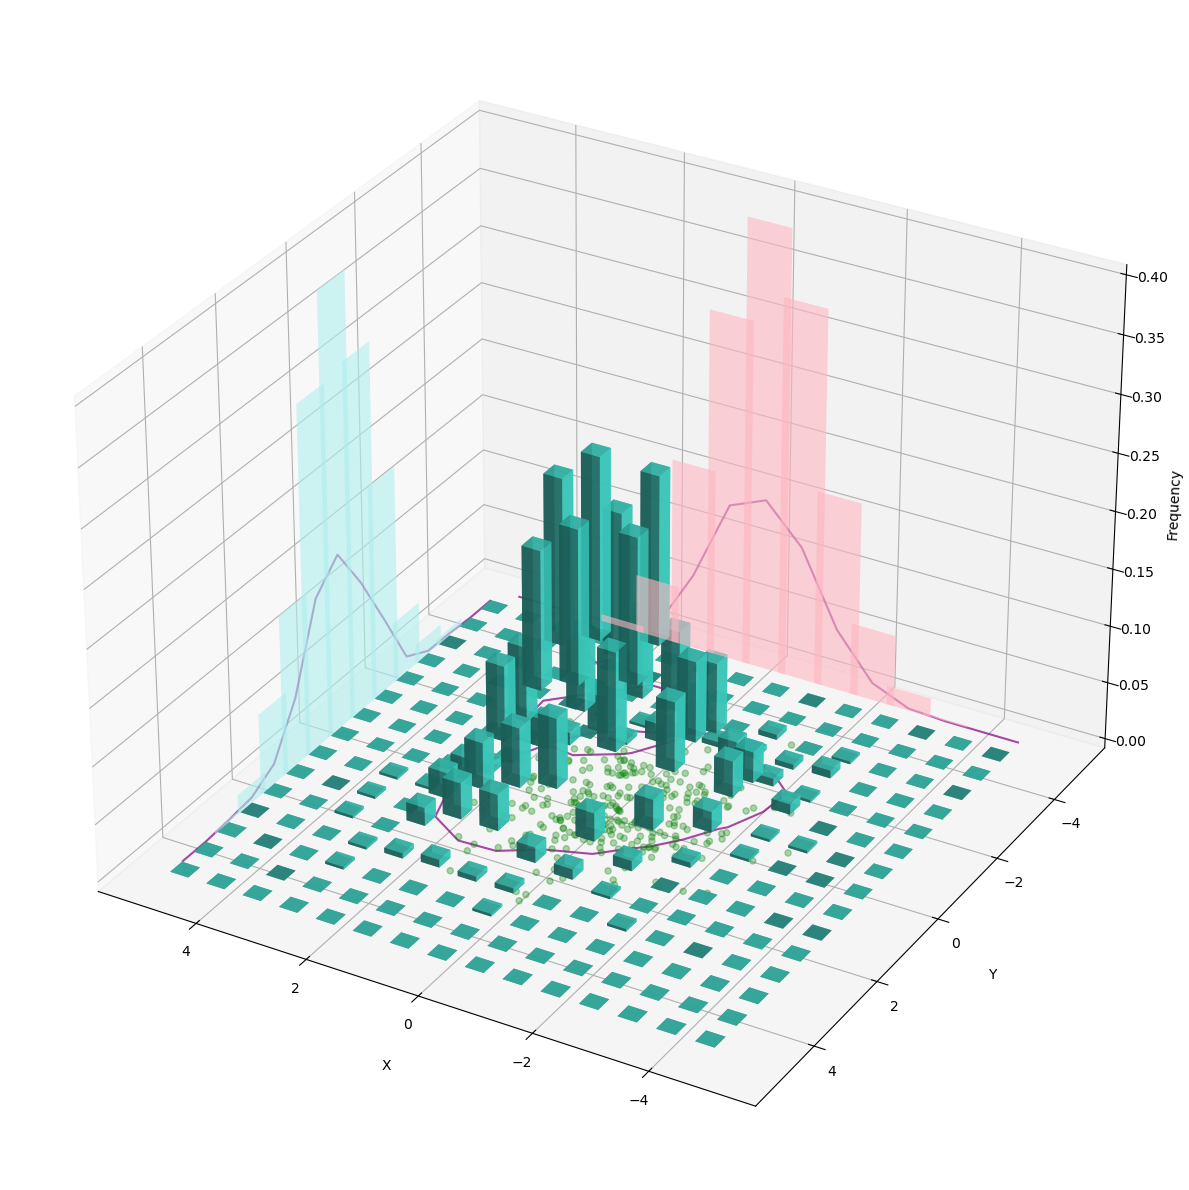

In [1]:
##Task 4##

# 计算随机数的二维平均值和标准差，增加随机数的个数
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成二维正态分布随机数
Nr = 1000

xy_means = np.array([0, 0])  # 均值
xy_cov = np.array([[1, 0.5], [0.5, 1]])  # 协方差矩阵

# 生成符合多元正态分布的随机数
xy_mesh = np.random.multivariate_normal(xy_means, xy_cov, size=Nr)
x_rand, y_rand = xy_mesh[:, 0], xy_mesh[:, 1]

# 检查生成结果的统计信息
print(f"二维随机数列的平均值为{xy_mesh.mean(axis=0)}")
print(f"二维随机数列的标准差为{xy_mesh.std(axis=0)}")
print(f"二维随机数列的协方差矩阵为{np.cov(xy_mesh.T)}")

# 计算二维直方图
n_sig = 5  # 5-sigma for statistics
xmin, xmax = xy_means[0] - n_sig * xy_cov[0, 0], xy_means[0] + n_sig * xy_cov[0, 0]
ymin, ymax = xy_means[1] - n_sig * xy_cov[1, 1], xy_means[1] + n_sig * xy_cov[1, 1]
Nx, Ny = 15, 15

# 计算二维直方图
xy_hist, xedges, yedges = np.histogram2d(x_rand, y_rand, bins=[Nx, Ny], range=[[xmin, xmax], [ymin, ymax]], density=True)

# 生成网格
x_grid = (xedges[:-1] + xedges[1:]) / 2  # 一维网格
y_grid = (yedges[:-1] + yedges[1:]) / 2  # 一维网格
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid, indexing="ij")

# 通过控制bins和range，确保一维直方图和二维直方图的分箱一致，后续x_grid,x_grid可共用
x_hist, xedges_x = np.histogram(x_rand, bins=Nx, range=[xmin, xmax], density=True)
y_hist, yedges_y = np.histogram(y_rand, bins=Ny, range=[ymin, ymax], density=True)

# 绘制三维直方图
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=120)

# 绘制x轴和y轴方向的一维直方图
ax.bar(x_grid, x_hist, zs=xmin, zdir='y', alpha=0.6,color="LightPink") 
ax.bar(y_grid, y_hist, zs=ymax, zdir='x', alpha=0.6, color='PaleTurquoise')

# 设置柱状图宽度
dx = (xedges[1] - xedges[0]) / 2
dy = dx
dz = xy_hist.ravel()

# 绘制三维柱状图：使用ax.bar3d绘制三维柱状图，并设置z轴的范围
ax.bar3d(x_mesh.ravel(), y_mesh.ravel(), xy_hist.ravel(), dx, dy, dz, alpha=0.8, color='Turquoise')
ax.set_zlim(0, 0.4)

# 从随机数中随机抽取300个点，绘制散点图
N_s = 300
ax.scatter(np.random.choice(x_rand, size=N_s), np.random.choice(y_rand, size=N_s), zdir='z', alpha=0.3, color='green')

# 绘制轮廓图：在z轴、x轴和y轴方向绘制等高线轮廓图，显示直方图的频率分布
z_min, z_max = np.min(xy_hist), np.max(xy_hist)
zlevels = [z_min + 0.1 * (z_max - z_min), z_min + 0.50 * (z_max - z_min), z_min + 0.90 * (z_max - z_min)]
ax.contour(x_mesh, y_mesh, xy_hist, levels=zlevels, zdir='z', colors='purple', alpha=0.7, linewidths=1.5)
ax.contour(x_mesh, y_mesh, xy_hist, levels=[z_min + 0.9 * (z_max - z_min)], zdir='x', offset=5, colors='purple',
           alpha=0.7, linewidths=1.5)
ax.contour(x_mesh, y_mesh, xy_hist, levels=[z_min + 0.9 * (z_max - z_min)], zdir='y', offset=-5, colors='purple',
           alpha=0.7, linewidths=1.5)

# 设置坐标轴标签：为x轴和y轴设置标签，并增加标签的填充间距
ax.set_xlabel('X', labelpad=15)
ax.set_ylabel('Y', labelpad=15)
ax.set_zlabel('Frequency',labelpad=5)

plt.savefig('三维柱状图.png', dpi=300)
plt.tight_layout()  # 自动调整子图参数以填充图形区域
plt.show()  # 符合正态分布，那么直方图应该呈现出一个钟形曲面的形状

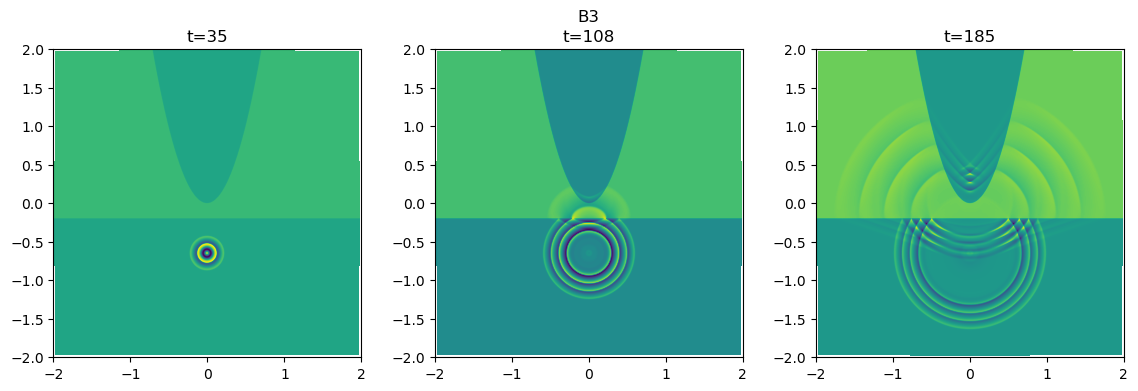

Saved grouped image: Picture/group_0000.png
Saved grouped image: Picture/group_0001.png
Saved grouped image: Picture/group_0002.png
Saved grouped image: Picture/group_0003.png
Saved grouped image: Picture/group_0004.png
Saved grouped image: Picture/group_0005.png
Saved grouped image: Picture/group_0006.png
Saved grouped image: Picture/group_0007.png
Saved grouped image: Picture/group_0008.png
Saved grouped image: Picture/group_0009.png
Saved grouped image: Picture/group_0010.png
Saved grouped image: Picture/group_0011.png
Saved grouped image: Picture/group_0012.png
Saved grouped image: Picture/group_0013.png
Saved grouped image: Picture/group_0014.png
Saved grouped image: Picture/group_0015.png
Saved grouped image: Picture/group_0016.png
Saved grouped image: Picture/group_0017.png
Saved grouped image: Picture/group_0018.png
Saved grouped image: Picture/group_0019.png
Saved grouped image: Picture/group_0020.png
Saved grouped image: Picture/group_0021.png
Saved grouped image: Picture/gro

Saved grouped image: Picture/group_0187.png
Saved grouped image: Picture/group_0188.png
Saved grouped image: Picture/group_0189.png


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import astropy.units as u

datadir = "data"
figdir = "figures"
picdir = "Picture"

# 创建Picture目录，如果不存在的话
if not os.path.exists(picdir):
    os.makedirs(picdir)

def get_all_files(path):
    files = []
    for root, dirs, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('.fits'):
                files.append(os.path.join(root, filename))
    return files

file_list = get_all_files(datadir)
count = len(file_list)

file_ini = ["rho", "P", "B3"]
coord_ini = ["X", "Y"]
file_ext = "fits"
fig_ext = "eps"

def load_data(frame):
    fileB = os.path.join(datadir, "{:04d}".format(frame), "B3." + file_ext)
    fileX = os.path.join(datadir, "{:04d}".format(frame), coord_ini[0] + "." + file_ext)
    fileY = os.path.join(datadir, "{:04d}".format(frame), coord_ini[1] + "." + file_ext)
    
    B_data = fits.getdata(fileB)
    X_data = fits.getdata(fileX)
    Y_data = fits.getdata(fileY)
    
    return B_data, X_data, Y_data

B3_35, Xgrid, Ygrid = load_data(35)
B3_108, _, _ = load_data(108)
B3_185, _, _ = load_data(185)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.subplots_adjust(hspace=0.5, left=0.05, right=0.95)

L0 = 2.8e10 # cm 

boundary = (Xgrid[0, 0]/L0, Xgrid[-1, 0]/L0, Ygrid[0, 0]/L0, Ygrid[0, -1]/L0)

fig.suptitle("B3")
axes[0].set_title("t=35")
axes[0].imshow(B3_35, origin="lower", extent=boundary)
axes[1].set_title("t=108")
axes[1].imshow(B3_108, origin="lower", extent=boundary)
axes[2].set_title("t=185")
axes[2].imshow(B3_185, origin="lower", extent=boundary)

figname = os.path.join(figdir, "B3." + fig_ext)
plt.savefig(figname, format='eps', dpi=500)
plt.show()

# 生成分组图片的函数
def create_grouped_images(frames, file_ini, coord_ini, datadir, picdir, file_ext):
    L0 = 2.8e10  # cm
    for frame in frames:
        data = load_data(frame)
        boundary = (data[1][0, 0] / L0, data[1][-1, 0] / L0, data[2][0, 0] / L0, data[2][0, -1] / L0)
        
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
        fig.subplots_adjust(hspace=0.5, left=0.05, right=0.95)
        
        for i, var in enumerate(file_ini):
            file = os.path.join(datadir, "{:04d}".format(frame), f"{var}.{file_ext}")
            img_data = fits.getdata(file)
            axes[i].set_title(f"{var} (t={frame})")
            axes[i].imshow(img_data, origin="lower", extent=boundary)
            axes[i].set_xlabel("X (L0)")
            axes[i].set_ylabel("Y (L0)")

        grouped_picture_name = os.path.join(picdir, f"group_{frame:04d}.png")
        plt.savefig(grouped_picture_name, dpi=300)
        plt.close()
        print(f"Saved grouped image: {grouped_picture_name}")

# 调用生成分组图片函数，为所有时间步生成分组图片
# 假设时间步从0到200，可以根据实际情况调整
all_frames = range(190)
create_grouped_images(all_frames, file_ini, coord_ini, datadir, picdir, file_ext)

# 使用ffmpeg制作分组图片的视频
#os.system(f'ffmpeg -framerate 24 -pattern_type glob -i '*.png' -c:v libx264 -pix_fmt yuv420p movie.mp4')


